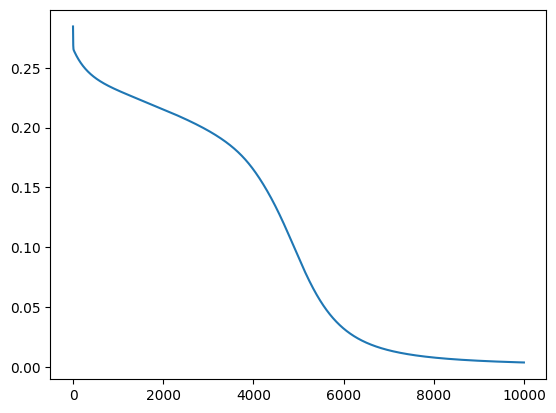

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])


class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10  # Number of neurons in the first hidden layer
        hiddenLayer2Neurons = 10  # Number of neurons in the second hidden layer
        outLayerNeurons = 1

        self.learning_rate = 0.2

        # Initialize weight matrices for both hidden layers and the output layer
        self.W_H1H2 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2H3 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3O = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        # Calculate the output of the first hidden layer
        hidden1_input = np.dot(X, self.W_H1H2)
        self.hidden1_output = self.sigmoid(hidden1_input)

        # Calculate the output of the second hidden layer
        hidden2_input = np.dot(self.hidden1_output, self.W_H2H3)
        self.hidden2_output = self.sigmoid(hidden2_input)

        # Calculate the final output
        output_input = np.dot(self.hidden2_output, self.W_H3O)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_H3O.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H3.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_H1H2 += X.T.dot(hidden1_delta)
        self.W_H2H3 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3O += self.hidden2_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)


In [3]:
output_00 = NN.feedForward([0, 0])
output_11 = NN.feedForward([1, 1])
output_10 = NN.feedForward([1, 0])
output_01 = NN.feedForward([0, 1])

print("Output for [0, 0]:", output_00)
print("Output for [1, 1]:", output_11)
print("Output for [1, 0]:", output_10)
print("Output for [0, 1]:", output_01)


Output for [0, 0]: [0.04935136]
Output for [1, 1]: [0.07128615]
Output for [1, 0]: [0.93764785]
Output for [0, 1]: [0.94072683]
